In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd

In [2]:
cal = pd.read_csv("cal.csv")

In [3]:
cal.head()

,Unnamed: 0,Severity,Start_Time,Start_Lat,Start_Lng,Street,City,County,State,Zipcode,Temperature(F),Weather_Condition
0,728,3,2016-06-21 10:34:40,38.085300,-122.233017,Magazine St,Vallejo,Solano,CA,94591,75.0,Clear
1,729,3,2016-06-21 10:30:16,37.631813,-122.084167,I-880 N,Hayward,Alameda,CA,94544,75.0,Clear
2,730,2,2016-06-21 10:49:14,37.896564,-122.070717,I-680 N,Walnut Creek,Contra Costa,CA,94595,82.9,Clear
3,731,3,2016-06-21 10:41:42,37.334255,-122.032471,N De Anza Blvd,Cupertino,Santa Clara,CA,95014,75.9,Clear
4,732,2,2016-06-21 10:16:26,37.250729,-121.910713,Norman Y Mineta Hwy,San Jose,Santa Clara,CA,95118,75.2,Clear


## Most "Dangerous" Road

In [4]:
street_severity = cal.groupby('Street').mean()['Severity']

In [5]:
street_count = cal.groupby('Street').count()['Start_Time']

In [6]:
road = pd.concat([street_severity, street_count], axis=1).reset_index()
road = road.rename(columns={'Start_Time': 'Number of Accidents'})
most_severe_road = road.loc[road['Severity'] == 4].sort_values('Number of Accidents', ascending=False)
most_accidents_road = road.loc[road['Number of Accidents'].idxmax()]

In [7]:
#Streets with highest average accident severity
most_severe_road.head()

,Street,Severity,Number of Accidents
4223,S Coast Hwy,4.0,4
4929,Sunflower Ave,4.0,4
411,Barstow Rd,4.0,4
4303,S Harbor Blvd,4.0,4
2513,Lake St,4.0,3


In [8]:
#Street with highest number of accidents
road_accidents_df = pd.DataFrame(most_accidents_road).T
road_accidents_df

,Street,Severity,Number of Accidents
14534,I-5 N,2.62842,20004


## Most "Dangerous" County

In [9]:
county_severity = cal.groupby('County').mean()['Severity']

In [10]:
county_count = cal.groupby('County').count()['Start_Time']

In [11]:
county = pd.concat([county_severity, county_count], axis=1).reset_index()
county = county.rename(columns={'Start_Time': 'Count'})
most_severe_county = county.loc[county['Severity'].idxmax()]
most_accidents_county = county.loc[county['Count'].idxmax()]

In [12]:
#County with highest average accident severity
county_severity_df = pd.DataFrame(most_severe_county).T
county_severity_df

,County,Severity,Count
47,Solano,2.55253,10032


In [13]:
#County with largest number of accidents
county_frequency_df = pd.DataFrame(most_accidents_county).T
county_frequency_df

,County,Severity,Count
18,Los Angeles,2.40523,227180


In [18]:
county

,County,Severity,Count
0,Alameda,2.537417,45367
1,Alpine,2.250000,60
2,Amador,2.060686,758
3,Butte,2.071479,1413
4,Calaveras,2.053937,927
5,Colusa,2.269333,375
6,Contra Costa,2.341082,23059
7,Del Norte,2.078125,192
8,El Dorado,2.047855,3030
9,Fresno,2.079451,6998


## Visualizations

Text(0.5, 1.0, 'Number of Accidents vs. Accident Severity for Roads')

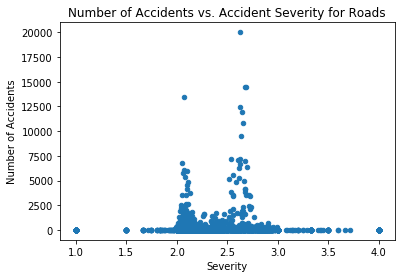

In [26]:
sev_num = road.plot.scatter('Severity', 'Number of Accidents')
sev_num.set_title("Number of Accidents vs. Accident Severity for Roads")

Text(0.5, 1.0, 'Number of Accidents vs. Accident Severity for County')

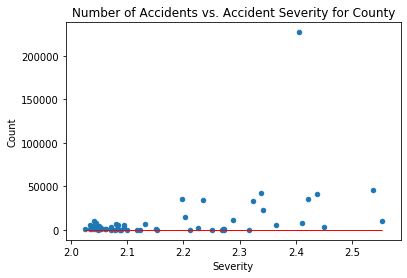

In [27]:
m_slope, m_int, m_r, m_p, m_std_err = st.linregress(county.Count, county.Severity)
m_fit = m_slope * county.Severity + m_int
county_plot = county.plot.scatter('Severity', 'Count')
county_plot.plot(county.Severity, m_fit, 'r', linewidth=0.5)
county_plot.set_title('Number of Accidents vs. Accident Severity for County')